In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/league-of-legends-diamond-ranked-games-10-min/high_diamond_ranked_10min.csv


# League of Legends Ranked Win Rate Analysis (First 10 Mins)

In [2]:
data = pd.read_csv('/kaggle/input/league-of-legends-diamond-ranked-games-10-min/high_diamond_ranked_10min.csv')

In [3]:
# Preview of Data Set
# Whether or not blue wins is recorded via boolean (1 == blue team won game, 0 == red team won game)
data.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [4]:
# Column Names
print(data.columns)

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')


In [5]:
# average statistics at 10 mins
data.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,...,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,...,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,...,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,...,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,...,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,...,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


# Is our dataset balanced? Is there an ~ equal number of blue team wins and red team wins?

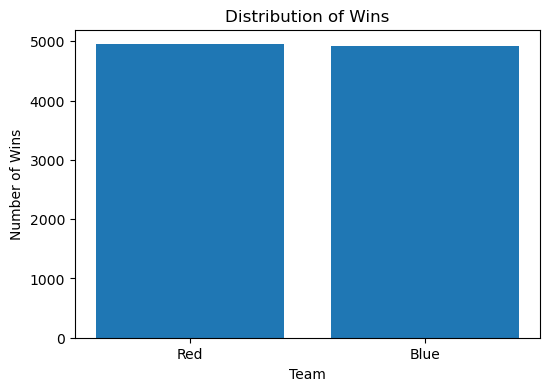

Class Distribution:
0    0.500962
1    0.499038
Name: blueWins, dtype: float64


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the number of wins for each team
win_counts = data['blueWins'].value_counts()

# Bar plot of the distribution of wins
plt.figure(figsize=(6, 4))
plt.bar(win_counts.index, win_counts.values)
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(win_counts.index, ['Red', 'Blue'])
plt.title('Distribution of Wins')
plt.show()

# Analyze the class distribution
class_distribution = win_counts / win_counts.sum()

print('Class Distribution:')
print(class_distribution)

# We can see that this is a balanced dataset

# Relationshsip Between Number of Kills by Team and Game Outcome (at 10 mins)

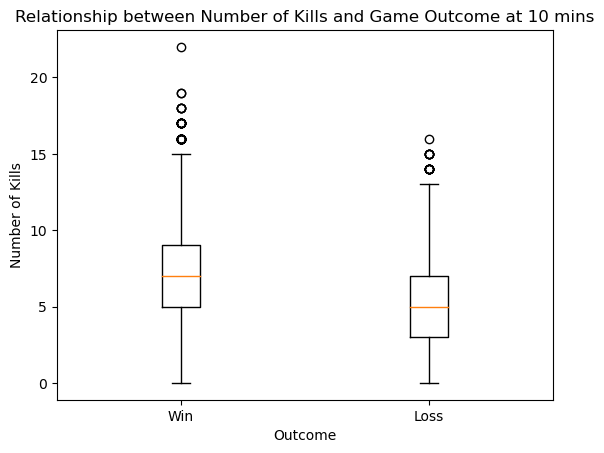

Correlation Coefficient between # Kills and Wins: 0.3373576105342439
We see a moderately strong correlation between number of kills and whether or not the team wins.
Per the box plot, we see the 1st Quartile, Median, and 3rd Quartile values for kills are all higher when a team wins vs. when a team loses


In [7]:
blue_wins = data[data['blueWins'] == 1]
blue_losses = data[data['blueWins'] == 0]

# Create a box plot comparing kills for when a team wins and when it loses
plt.boxplot([blue_wins['blueKills'], blue_losses['blueKills']], labels=['Win', 'Loss'])

# Set labels and title
plt.xlabel('Outcome')
plt.ylabel('Number of Kills')
plt.title('Relationship between Number of Kills and Game Outcome at 10 mins')

# Show the plot
plt.show()


correlation = np.corrcoef(data['blueKills'], data['blueWins'])[0, 1]
print('Correlation Coefficient between # Kills and Wins:', correlation)

print('We see a moderately strong correlation between number of kills and whether or not the team wins.')
print('Per the box plot, we see the 1st Quartile, Median, and 3rd Quartile values for kills are all higher when a team wins vs. when a team loses')

# Correlation between First Blood and Game Outcome

Correlation Coefficient between First Blood and Wins: 0.20176926438571077
Win Rate Given First Blood: 0.5989572889512733
Whether a team gets first blood (first kill of the match, which grants bonus gold), has a positive correlation with whether that team wins
Statistically, the team that gets first blood wins around 59.9% of matches.


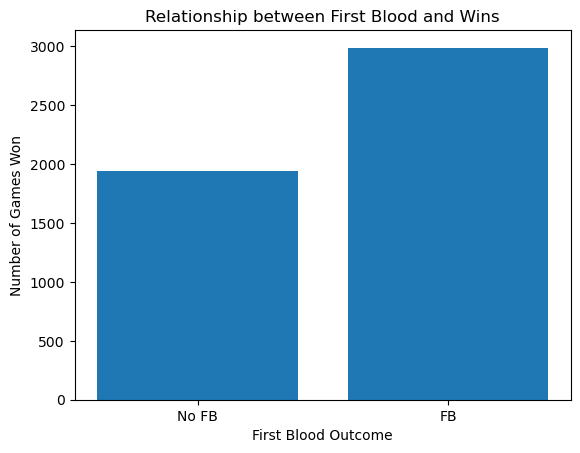

In [8]:
#  Correlation between blue first bloods and blue wins
wins_by_first_blood = data.groupby('blueFirstBlood').blueWins.sum()
plt.bar(wins_by_first_blood.index, wins_by_first_blood.values)

plt.xlabel('First Blood Outcome')
plt.xticks([0, 1], ['No FB', 'FB'])
plt.ylabel('Number of Games Won')
plt.title('Relationship between First Blood and Wins')

correlation = np.corrcoef(data['blueFirstBlood'], data['blueWins'])[0, 1]
print('Correlation Coefficient between First Blood and Wins:', correlation)

# Get games where blue got first blood
blue_first_blood_games = data[data['blueFirstBlood'] == 1]

# Calculate number of wins when blue team got first blood
blue_first_blood_wins = blue_first_blood_games[blue_first_blood_games['blueWins'] == 1]
num_wins = len(blue_first_blood_wins)
total_wins = len(blue_first_blood_games)

print(f'Win Rate Given First Blood: {num_wins / total_wins}')

print('Whether a team gets first blood (first kill of the match, which grants bonus gold), has a positive correlation with whether that team wins')
print('Statistically, the team that gets first blood wins around 59.9% of matches.')

# Correlation between Vision Score and Win Rate at 10 mins

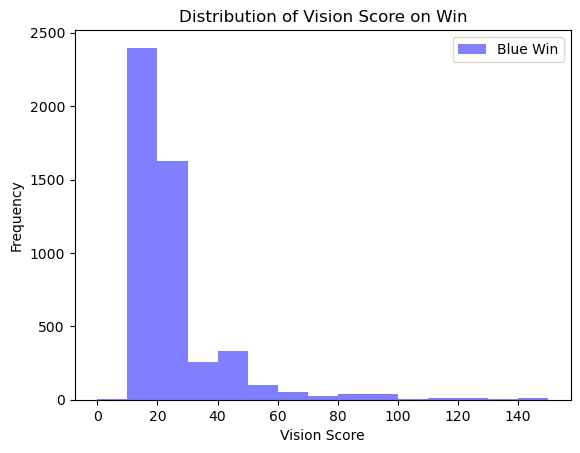

In [9]:
# Calculate the vision score by summing blue wards placed and blue wards destroyed
# This is different from the actual vision score formula provided by the game, but nonetheless provides a good estimate for vision dominance
data['visionScore'] = data['blueWardsPlaced'] + data['blueWardsDestroyed']

# Create separate data subsets for blue wins and blue losses
blue_wins = data[data['blueWins'] == 1]

# Set the bin range and number of bins for the histogram
bin_range = (0, 150)  
num_bins = 15  

# Create a histogram for blue wins
plt.hist(blue_wins['visionScore'], bins=num_bins, range=bin_range, alpha=0.5, label='Blue Win', color='blue')


# Set labels and title
plt.xlabel('Vision Score')
plt.ylabel('Frequency')
plt.title('Distribution of Vision Score on Win')

# Add a legend
plt.legend()

# Show the plot
plt.show()

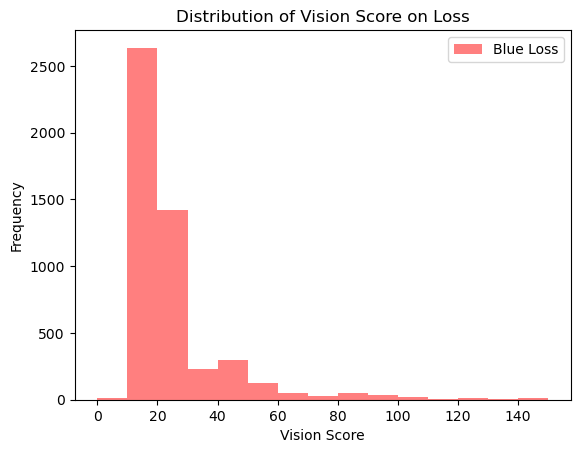

In [10]:
blue_losses = data[data['blueWins'] == 0]
# Set the bin range and number of bins for the histogram
bin_range = (0, 150)  # Adjust the range according to your data
num_bins = 15  # Adjust the number of bins as needed

# Create a histogram for blue losses
plt.hist(blue_losses['visionScore'], bins=num_bins, range=bin_range, alpha=0.5, label='Blue Loss', color='red')

# Set labels and title
plt.xlabel('Vision Score')
plt.ylabel('Frequency')
plt.title('Distribution of Vision Score on Loss')

# Add a legend
plt.legend()

# Show the plot
plt.show()


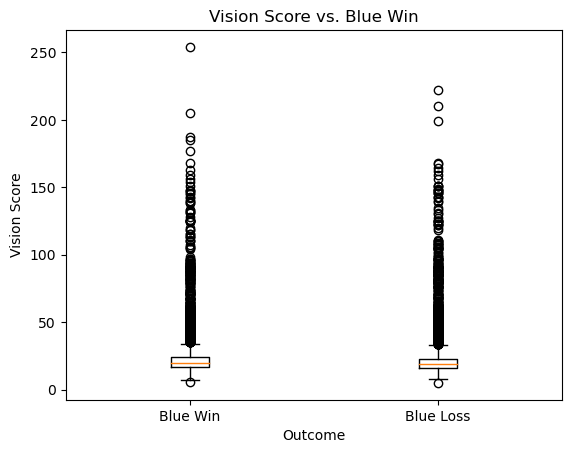

Mean Vision Score - Blue Wins: 25.211156186612577
Mean Vision Score - Blue Losses: 25.015558698727016
Median Vision Score - Blue Wins: 20.0
Median Vision Score - Blue Losses: 19.0
Stdev Vision Score - Blue Wins: 17.82475492378131
Stdev Vision Score - Blue Losses: 18.614878535898768
Interquartile Range - Blue Wins: 7.0
Interquartile Range - Blue Losses: 7.0
Correlation Coefficient: 0.005366683785397188
P-value: 0.5937927087116054
Conclusion: Vision Score at 10 minutes alone does not contribute much to win rate.
Of course, long time players know that vision score is VERY important to team success
However, this dataset only provides data from the first ten minutes, so early vision score may not be as impactful as we think.


In [11]:
from scipy.stats import pearsonr
blue_wins = data[data['blueWins'] == 1]
blue_losses = data[data['blueWins'] == 0]

# Create a box plot
plt.boxplot([data[data['blueWins'] == 1]['visionScore'], data[data['blueWins'] == 0]['visionScore']])
plt.xticks([1, 2], ['Blue Win', 'Blue Loss'])
plt.xlabel('Outcome')
plt.ylabel('Vision Score')
plt.title('Vision Score vs. Blue Win')
plt.show()

# 4 Summary Statistics

mean_vision_win = blue_wins['visionScore'].mean()
mean_vision_loss = blue_losses['visionScore'].mean()
print("Mean Vision Score - Blue Wins:", mean_vision_win)
print("Mean Vision Score - Blue Losses:", mean_vision_loss)

median_vision_win = blue_wins['visionScore'].median()
median_vision_loss = blue_losses['visionScore'].median()
print("Median Vision Score - Blue Wins:", median_vision_win)
print("Median Vision Score - Blue Losses:", median_vision_loss)

std_vision_win = blue_wins['visionScore'].std()
std_vision_loss = blue_losses['visionScore'].std()
print("Stdev Vision Score - Blue Wins:", std_vision_win)
print("Stdev Vision Score - Blue Losses:", std_vision_loss)

q1_wins = blue_wins['visionScore'].quantile(0.25)
q3_wins = blue_wins['visionScore'].quantile(0.75)
iqr_wins = q3_wins - q1_wins

q1_losses = blue_losses['visionScore'].quantile(0.25)
q3_losses = blue_losses['visionScore'].quantile(0.75)
iqr_losses = q3_losses - q1_losses

print("Interquartile Range - Blue Wins:", iqr_wins)
print("Interquartile Range - Blue Losses:", iqr_losses)


# Calculate the correlation coefficient and p-value
correlation, p_value = pearsonr(data['visionScore'], data['blueWins'])

print("Correlation Coefficient:", correlation)
print("P-value:", p_value)


print('Conclusion: Vision Score at 10 minutes alone does not contribute much to win rate.')
print('Of course, long time players know that vision score is VERY important to team success')
print('However, this dataset only provides data from the first ten minutes, so early vision score may not be as impactful as we think.')

# Relationship between Gold Difference at 10 minutes and Win Rate

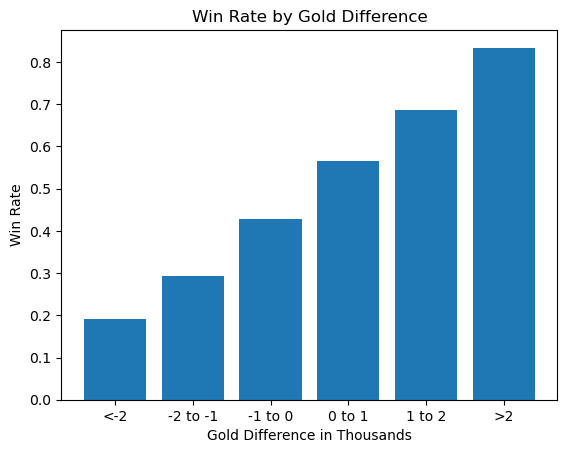

Correlation Coefficient between Gold Diff and Wins: 0.5111190551762511
We see a relatively strong positive correlation between gold difference between teams and whether or not a team wins
In simple terms, the richer team appears to win more often. This makes sense and is a strong feature to assess the state of the game.


In [12]:
ranges = [(-3000, -2000), (-2000, -1000), (-1000, 0), (0, 1000), (1000, 2000), (2000, 3000)]

win_rates = []
for lower, upper in ranges:
    filtered_data = data[(data['blueGoldDiff'] >= lower) & (data['blueGoldDiff'] < upper)]
    win_rate = filtered_data['blueWins'].mean()
    win_rates.append(win_rate)

labels = ['<-2', '-2 to -1', '-1 to 0', '0 to 1', '1 to 2', '>2']

plt.bar(labels, win_rates)

plt.xlabel('Gold Difference in Thousands')
plt.ylabel('Win Rate')
plt.title('Win Rate by Gold Difference')

plt.show()

correlation = np.corrcoef(data['blueGoldDiff'], data['blueWins'])[0, 1]
print('Correlation Coefficient between Gold Diff and Wins:', correlation)

print('We see a relatively strong positive correlation between gold difference between teams and whether or not a team wins')
print('In simple terms, the richer team appears to win more often. This makes sense and is a strong feature to assess the state of the game.')

# Feature Engineering

In [13]:
X = data.copy()
y = X['blueWins']
X.drop('blueWins', axis = 1, inplace = True)

# label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()
    
# the scikit learn algorithm for MI treats discrete features differently from continuous features
discrete_features = X.dtypes == int

print(X.shape)
print(y.shape)
print(discrete_features.shape)

(9879, 40)
(9879,)
(40,)


blueGoldDiff                    0.155914
redGoldDiff                     0.154990
blueExperienceDiff              0.138948
redExperienceDiff               0.138245
blueTotalGold                   0.098520
redTotalGold                    0.097075
redGoldPerMin                   0.097065
blueGoldPerMin                  0.095565
blueTotalExperience             0.088152
redTotalExperience              0.081426
redAvgLevel                     0.080598
blueDeaths                      0.072246
blueAvgLevel                    0.065867
redDeaths                       0.064598
blueKills                       0.054413
redKills                        0.052863
blueAssists                     0.051592
redAssists                      0.043924
redEliteMonsters                0.036731
blueEliteMonsters               0.036349
redDragons                      0.032550
redTotalMinionsKilled           0.029733
blueTotalMinionsKilled          0.025270
redCSPerMin                     0.024157
blueCSPerMin    

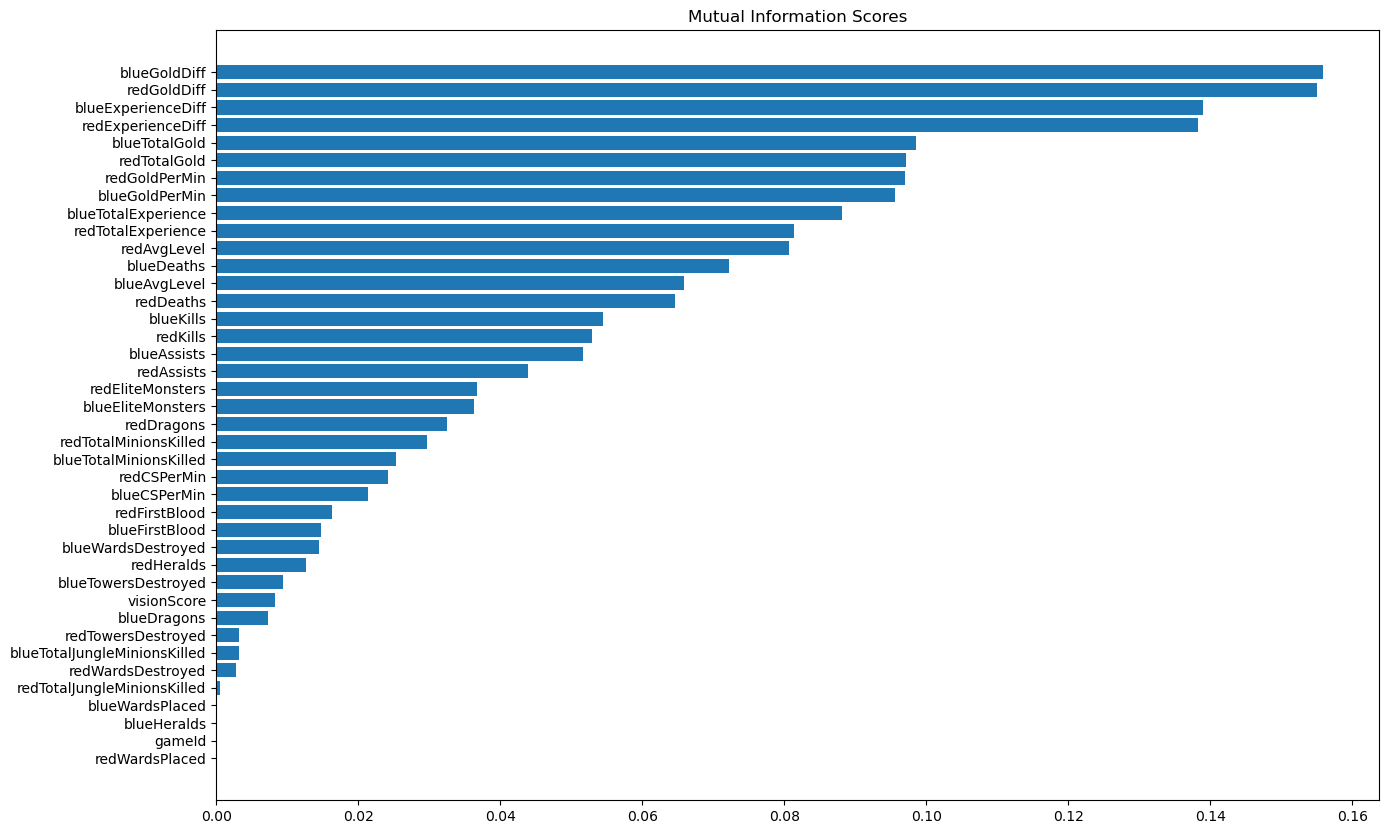

In [14]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features='auto', random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    
try:
    mi_scores = make_mi_scores(X, y)
except Exception as e:
    print("An error occurred while calculating MI scores:", str(e))
    
print(mi_scores)

plt.figure(dpi=100, figsize=(15, 10))
plot_mi_scores(mi_scores)

print('The following show how important each variable is in predicting the outcome of a match IN THE FIRST 10 MINS.')

# Binary Classifier (WIP)
# Goal is to create a ML model that can accurately predict whether or not the "blue team" won the game based on the other data.

Split data into features (X) and target variable (y)

In [15]:
X = data.drop('blueWins', axis=1) # all features except blueWins
y = data['blueWins'] # target variable

Split data into training and testing sets

In [16]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Define and train a classifier model

In [17]:
from sklearn.linear_model import LogisticRegression

# Create an instance of the Logistic Regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

LogisticRegression()

Evaluate model

In [18]:
from sklearn.metrics import accuracy_score

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.49291497975708504
